In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
def load_image(filename):
    img = mpimg.imread(filename)
    if len(img[0][0])==4: # if png file
        img = np.delete(img, 3, 2)
    if type(img[0][0][0])==np.float32:  # if stored as float in [0,..,1] instead of integers in [0,..,255]
        img = img*255
        img = img.astype(np.uint8)
    mask = np.ones((len(img),len(img[0]))) # create a mask full of "1" of the same size of the laoded image
    img = img.astype(np.int32)
    return img, mask

### `mask` in this case does not directly "hide" the color channels of the image. Instead, it's a separate array that corresponds to the height and width of the image but does not interact with the color channels in any way.

- img.shape returns (height,width,channels)
- mask.shape returns (height,width)
- (280,500,3) means there are 3 channels with height and width of 280 and 500 respectively
- img[1,1] will give (R,G,B) which is one pixel

In [3]:
img,mask=load_image('test.png')

In [4]:
img.shape

(280, 500, 3)

In [5]:
mask.shape

(280, 500)

### The function `save_image(filename, image)` is designed to save an image to a file, if file not created `imsave` auto creates for you

In [42]:
def save_image(filename, image):
    img = image.astype(np.uint8)
    mpimg.imsave(filename, img)

### Changing the brightness
In order to change the brightness of an image, you can simply add to each of the three RGB components an
integer value between -255 and +255 included (+255 will increase a lot the brightness, while -255 will reduce
it a lot). Remember that in RGB encoding, a component value can’t be smaller than 0 or greater than 255.
The input value will be queried to the user in the menu function (with error check). The function will return
the new image.

In [43]:
img_test=img
print(img_test.shape)

(5, 5, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-255..0].


(5, 5, 3) shape after changing brightness


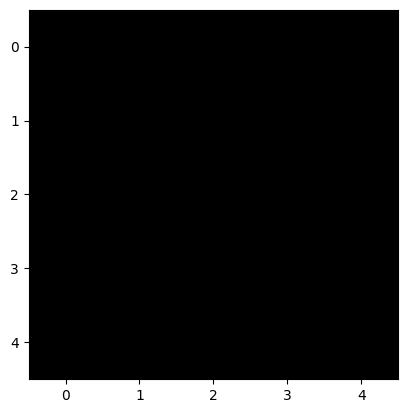

In [44]:
x=img_test+ -255
print(f'{x.shape} shape after changing brightness')
plt.imshow(x)

In [50]:
def change_brightness(image, value):
    new_img=image.copy()
    #extra precaution but the menu1 should check for proper user input
    #Also if dont clip, i will get the msg below 
    # Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-255..-16].
    new_img=np.clip(new_img+value,0,255).astype(np.uint8)
    
    return new_img


Text(0.5, 1.0, 'Brightening by 100')

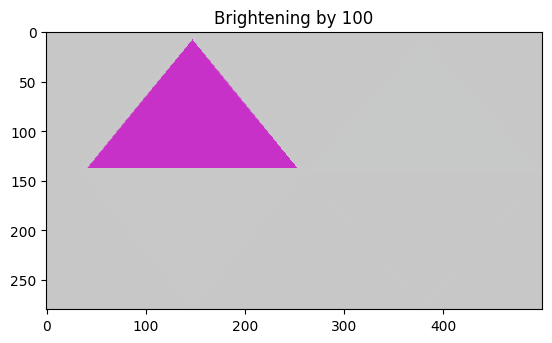

In [51]:
x=change_brightness(x,100)
plt.imshow(x)
plt.title('Brightening by 100')

### Changing the contrast.
- contrast correction factor F = 259∗(value+255) /
255∗(259−value) 
- R′ = F × (R − 128) + 128
- G′ = F × (G − 128) + 128
- B′ = F × (B − 128) + 128

In [45]:
def change_contrast(image, value):
    new_img=image.copy()
    contrast_f= (259*(value+255))/(255*(259-value))
    new_img=contrast_f*(new_img-128)+128
    #clipping for extraprecaution
    new_img=np.clip(new_img,0,255).astype(np.uint8)
    return new_img

In [46]:
img,mask=load_image('test.png')

Text(0.5, 1.0, 'change in contrast')

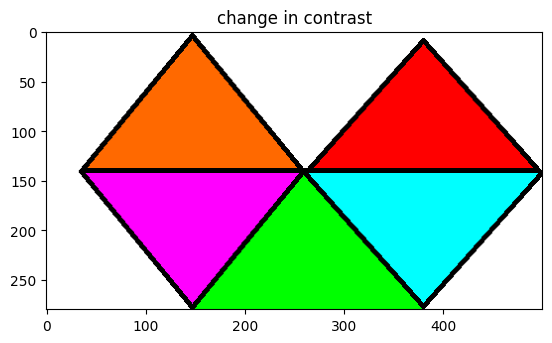

In [47]:
x=change_contrast(img,150)
plt.imshow(x)
plt.title('change in contrast')

### Gray Scale: 
Instead,
a better formula would then be to assign (0.3 · R + 0.59 · G + 0.11 · B) to each of the three RGB components for
each pixel of the image. The function will return the new image.


In [14]:
img.shape

(280, 500, 3)

In [15]:
img[2,2]

array([195, 195, 195], dtype=int32)

In [16]:
def grayscale(image):

    new_img=image.copy()
    #need to iter the entire array to get RGB, then apply the formula
    for i in range(new_img.shape[0]): #rows
        for j in range(new_img.shape[1]): #cols
            r,g,b=new_img[i,j]
            gray_value=int(0.3*r+0.59*g+0.11*b)
            new_r,new_g,new_b=gray_value,gray_value,gray_value
            #replacing original values to gray values
            new_img[i,j]=[new_r,new_g,new_b]
    new_img=new_img.astype(np.uint8)
    return new_img

In [17]:
x=grayscale(img)

Text(0.5, 1.0, 'Grayed')

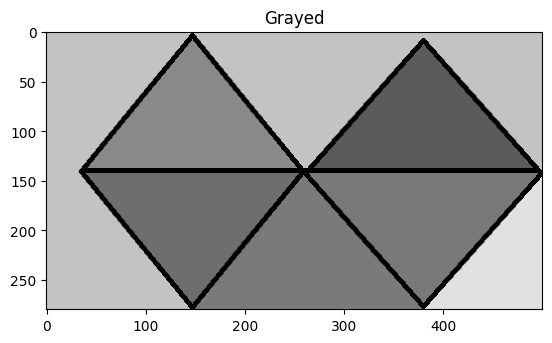

In [18]:
plt.imshow(x)
plt.title('Grayed')

### Blur_effect

### applying formula and applying to all the pixels so need iter color channel
- for the m region
https://www.notion.so/Blue-effect-M-explanation-12355855d6e98088a0b5dd0c38e3ecb2

In [19]:
img[:,:,2].shape

(280, 500)

In [20]:
img.shape[2]

3

In [21]:
def blur_effect(image):

    new_img=image.copy()
    k=np.array([[0.0625, 0.125, 0.0625],[0.125, 0.25, 0.125],[0.0625, 0.125, 0.0625]])
    #iter the entire array and we excluding the borders CUZ we do not wan to blur the frame so -1 !
    for i in range(1, new_img.shape[0]-1):
        for j in range(1,new_img.shape[1]-1):
            #the 3x3 matrix around the current pixel to get M in the pdf doc
            M = image[i-1:i+2,j-1:j+2]  # 3x3 region
            
            for c in range(new_img.shape[2]):
                #not mat mul is element wise multiplication
                new_img[i, j, c] = np.sum(M[:,:,c]*k)
    
    new_img=new_img.astype(np.uint8)
    return new_img

In [22]:
x=blur_effect(img)
x=blur_effect(x)
x=blur_effect(x)
x=blur_effect(x)
x=blur_effect(x)
x=blur_effect(x)

Text(0.5, 1.0, 'Blured Picture')

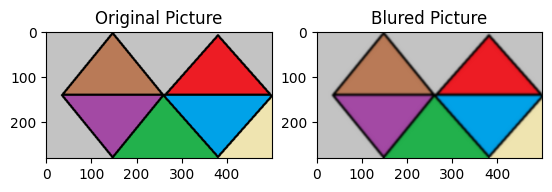

In [23]:
fig,ax=plt.subplots(1,2,figure=(24,2))

ax[0].imshow(img)
ax[0].set_title('Original Picture')
ax[1].imshow(x)
ax[1].set_title('Blured Picture')


### Edge detection effect: same as blur but diff kernel and add 128 to each component but need clip

In [24]:
 
def edge_detection(image):

    new_img=image.copy()
    k=np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    #iter the entire array and we excluding the borders CUZ we do not wan to blur the frame so -1 !
    for i in range(1, new_img.shape[0]-1):
        for j in range(1,new_img.shape[1]-1):
            #the 3x3 matrix around the current pixel to get M in the pdf doc
            M = image[i-1:i+2,j-1:j+2]  # 3x3 region
            
            for c in range(new_img.shape[2]):
                #not mat mul is element wise multiplication
                new_img[i, j, c] = np.sum(M[:,:,c]*k) + 128
    
    #new_img+=128
    new_img=np.clip(new_img,0,255)
    return new_img

In [25]:
img, _ = load_image("mini_test.jpg")
img_cpr = np.array([91 ,0 ,0 ,155 ,32 ,113 ,74 ,0 ,177 ,174 ,139 ,255 ,33 ,66 ,145 ,84 ,69 ,234 ,255 ,255 ,255 ,0 ,0 ,0 ,255 ,255 ,107 ,81 ,3 ,105 ,110 ,99 ,0 ,255 ,255 ,255 ,0 ,0 ,0 ,255 ,255 ,255 ,217 ,24 ,87 ,108 ,121 ,16 ,255 ,255 ,255 ,255 ,255 ,255 ,255 ,255 ,255 ,56 ,245 ,145 ,82 ,153 ,145 ,49 ,100 ,0 ,140 ,187 ,23 ,99 ,177 ,91 ,18 ,147 ,202 , ]).reshape(5,5,3)
image = edge_detection(img)
print(len(image))
print(image.size)
print(img_cpr.size)
print(np.allclose(img_cpr,image,atol=1))
#         F                          not (F)= T ==T
if len(image)==0 or not (img_cpr.size==image.size and np.allclose(img_cpr,image,atol=1)): print("test edge_detection - Problem in the edge_detection function output !")
else: print("test edge_detection - OK !") 

5
75
75
True
test edge_detection - OK !


Text(0.5, 1.0, 'Edge detection Picture')

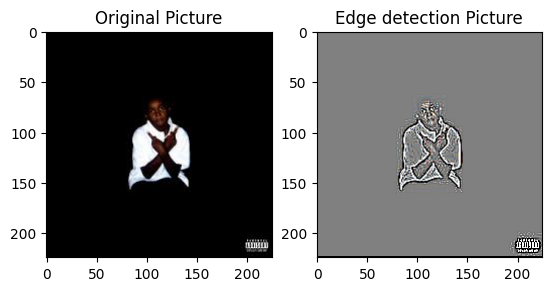

In [26]:
img,mask=load_image('ken_dark.jpg')
x=edge_detection(img)
fig,ax=plt.subplots(1,2,figure=(24,2))

ax[0].imshow(img)
ax[0].set_title('Original Picture')
ax[1].imshow(x)
ax[1].set_title('Edge detection Picture')

Text(0.5, 1.0, 'Edge detection Picture')

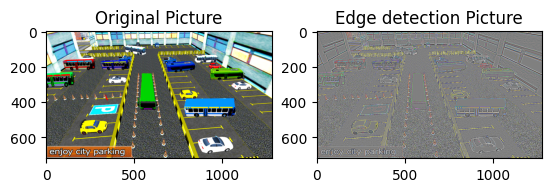

In [27]:
img,mask=load_image('parking.png')
x=edge_detection(img)
fig,ax=plt.subplots(1,2,figure=(24,2))

ax[0].imshow(img)
ax[0].set_title('Original Picture')
ax[1].imshow(x)
ax[1].set_title('Edge detection Picture')

### Emboss Effect same as above but diff kernel and add 128 to each component

In [28]:
def embossed(image):

    new_img=image.copy()
    k=np.array([[-1, -1, 0],[-1, 0, 1],[0, 1, 1]])
    #iter the entire array and we excluding the borders CUZ we do not wan to blur the frame so -1 !
    for i in range(1, new_img.shape[0]-1):
        for j in range(1,new_img.shape[1]-1):
            #the 3x3 matrix around the current pixel to get M in the pdf doc
            M = image[i-1:i+2,j-1:j+2]  # 3x3 region
            
            for c in range(new_img.shape[2]):
                new_img[i, j, c] = np.sum(M[:,:,c]*k) + 128
    #new_img+=128
    new_img=np.clip(new_img,0,255)
    new_img=new_img.astype(np.uint8)
    return new_img

Text(0.5, 1.0, 'embossed Picture')

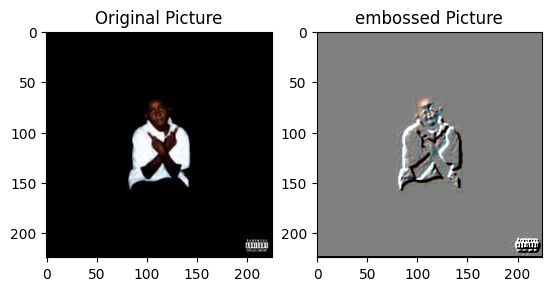

In [29]:
img,mask=load_image('ken_dark.jpg')
x=embossed(img)
fig,ax=plt.subplots(1,2,figure=(24,2))

ax[0].imshow(img)
ax[0].set_title('Original Picture')
ax[1].imshow(x)
ax[1].set_title('embossed Picture')

### Rectangle selection.
The first one, rectangle select, is quite simple: given a top left pixel position x and a bottom right pixel
position y as inputs, the selection mask will be updated to consist only of the pixels located in the rectangle
defined by the points x and y. The new selection mask is then returned by the function.
Before calling the function rectangle select, the menu function should ask the user (with error check) for
two pixel positions x and y

-`1` in the mask means the pixel is selected 

-`0` in the mask means the pixel is not selected
-`x` and `y` acts like a border

- x = (1, 1) and y = (3, 3) gives the below

- 0 0 0 0 0
- 0 1 1 1 0
- 0 1 1 1 0
- 0 1 1 1 0
- 0 0 0 0 0

In [30]:
print(mask[0])
print(f'Shape of mask: {mask.shape}')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Shape of mask: (225, 225)


make a matrix with all zeros then apply the border

In [31]:
new_mask=np.zeros(mask.shape)

In [32]:
new_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
new_mask.shape

(225, 225)

In [34]:
# x and y are pixels

x1,y1=(65,3)
x2,y2=(150,220)
new_mask=np.zeros(mask.shape)

In [35]:
new_mask[x1:x2+1,y1:y2+1]=1

Text(0.5, 1.0, 'Mask Visualization')

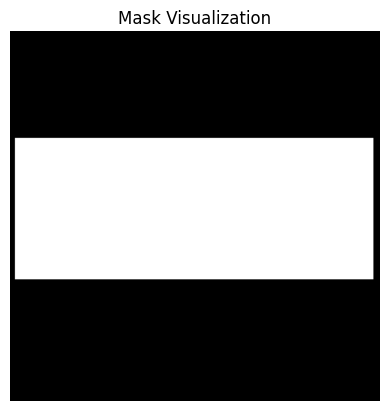

In [36]:
#1 is white #0 is black
plt.imshow(new_mask, cmap='gray')
plt.axis('off') 
plt.title('Mask Visualization')

In [37]:
def load_image(filename):
    img = mpimg.imread(filename)
    if len(img[0][0])==4: # if png file
        img = np.delete(img, 3, 2)
    if type(img[0][0][0])==np.float32:  # if stored as float in [0,..,1] instead of integers in [0,..,255]
        img = img*255
        img = img.astype(np.uint8)
    mask = np.ones((len(img),len(img[0]))) # create a mask full of "1" of the same size of the laoded image
    img = img.astype(np.int32)
    return img, mask

def rectangle_select(image, x, y):
    #top left
    x1,y1=x
    #bot right
    x2,y2=y
    #zero matrix
    new_mask=np.zeros((image.shape[0],image.shape[1]))
    #apply filter with slicing
    new_mask[x1:x2+1,y1:y2+1]=1
    return new_mask

# ***************** rectangle_select test ***************** #
img, _ = load_image("mini_test.jpg")
mask_cpr = np.array([0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,
                     0.0 ,1.0 ,1.0 ,1.0 ,1.0 ,
                     0.0 ,1.0 ,1.0 ,1.0 ,1.0 ,
                     0.0 ,1.0 ,1.0 ,1.0 ,1.0 ,
                     0.0 ,0.0 ,0.0 ,0.0 ,0.0 , ]).reshape(5,5)

# Call rectangle_select with the correct coordinates
mask = rectangle_select(img, (1, 1), (3, 4))

# Check if the test passes
if len(img) == 0 or not np.array_equal(mask_cpr, mask): 
    print("test rectangle_select - Problem in the rectangle_select function output!")
else: 
    print("test rectangle_select - OK!")


test rectangle_select - OK!


In [38]:
img, _ = load_image("mini_test.jpg")

In [39]:
mask = rectangle_select(img, (1, 1), (3, 4))

In [40]:
mask

array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [41]:
""""x=input('Enter Your top left X coordinate x1,y1: ').replace(' ',',')
print(x)
resX =[int(x) for x in (x.split(','))]
resX=tuple(resX)
print(resX)"""
"""
try:
                        x=input('Enter Your top left X coordinate x1,y1: ').replace(' ',',')
                        resX =[int(x) for x in (x.split(','))]
                        resX=tuple(resX)
except:
                        print('Invalid X coordinate input!(include the coma, if u have not)')
                        print('Bringing you back to menu...\n')
                        #menu1(img,mask)
try:
                        Y=input('Enter Your bottom right Y coordinate x2,y2: ').replace(' ',',')
                        resY =[int(Y) for Y in (Y.split(','))]
                        resY=tuple(resY)
except:
                        print('Invalid Y coordinate input!(include the coma, if u have not)')
                        print('Bringing you back to menu...\n')
                        #menu1(img,mask)
if resX[0]<0 or resX[0]<0 or resY[0]>=img.shape[0] or resY[1]>=img.shape[1]:
                        print('Coordinates are out of bounds!')
                        print('Bringing you back to menu...\n')
                        #menu1(img,mask)
if resX[0]>resY[0] or resX[1]>resY[1]:
                        print('Your X coordinate must be top left and Y coordinate must be bottom left!')
                        print('Bringing You back to menu...\n') 
                        #menu1(img,mask)

try:
                        mask=rectangle_select(img,resX,resY)
                        print('\nRectangle Select Done Successfully!\n')
                        #menu1(img,mask)
except:
                        print('\nSomething went wrong! Bring you back to menu...\n')"""
                        #menu1(img,mask)"

Invalid X coordinate input!(include the coma, if u have not)
Bringing you back to menu...

Invalid Y coordinate input!(include the coma, if u have not)
Bringing you back to menu...



NameError: name 'resX' is not defined

### Magic Wand

In [ ]:
def magic_wand_select(image, x, thres):
    # Initialize mask with zeros
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    rows, cols, _ = image.shape

    # Get the target pixel color
    target_color = image[x[0], x[1]]
    
    # Stack for flood fill
    stack = [x]

    # Lambda function to calculate color distance
    def color_distance(p1, p2):
        dR, dG, dB = p1[0] - p2[0], p1[1] - p2[1], p1[2] - p2[2]
        r_avg = (p1[0] + p2[0]) / 2
        return ((2 + r_avg / 256) * dR ** 2 + 4 * dG ** 2 + (2 + (255 - r_avg) / 256) * dB ** 2) ** 0.5
    
    # Perform flood fill
    while stack:
        curr_x, curr_y = stack.pop()
        if mask[curr_x, curr_y] == 1:
            continue

        # Mark the current pixel as selected
        mask[curr_x, curr_y] = 1
        
        # Check neighboring pixels
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = curr_x + dx, curr_y + dy

            if 0 <= nx < rows and 0 <= ny < cols and mask[nx, ny] == 0:
                neighbor_color = image[nx, ny]
                # Check if neighbor pixel is within the threshold
                if color_distance(target_color, neighbor_color) <= thres:
                    stack.append((nx, ny))
                    
    return mask


case '8':
    # Get pixel position x from user
    try:
        x = input("Enter the pixel position (x, y) as 'x,y': ").replace(' ', '').split(',')
        x = tuple(map(int, x))
        if x[0] < 0 or x[1] < 0 or x[0] >= img.shape[0] or x[1] >= img.shape[1]:
            print("Invalid pixel position. Coordinates out of bounds.")
            continue
    except:
        print("Invalid input format. Use 'x,y' for the coordinates.")
        continue

    # Get threshold thres from user
    try:
        thres = int(input("Enter the threshold value (e.g., 200): "))
    except:
        print("Invalid input. Threshold should be an integer.")
        continue

    # Call magic_wand_select
    mask = magic_wand_select(img, x, thres)
    print("\nMagic Wand Selection Done Successfully!\n")
    display_image(img, mask)
